<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


## Importing the Dataset


# Medical Insurance Cost Prediction

Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
data = pd.read_csv('G:\data\insurance.csv', sep=',')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


The dataset under investigation contains information regarding medical costs incurred by individuals meeting specific criteria. This comprises 1338 observations
alongside 7 columns, corresponding to individual medical expenditures in the United
States as available on the Kaggle platform. It forms a part of a broader statistical
learning project focusing on insurance analysis.

age: age of primary beneficiary \
sex: insurance contractor gender, (female or male) \
bmi: Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 \
children: number of children covered by health insurance (number of dependents) \
smoker: whether somenoe's smoking or not (yes / no) \
region: the beneficiary's residential area in the US (northeast, southeast, southwest, northwest) \
charges: individual medical costs billed by health insurance

Source: https://www.kaggle.com/datasets/mirichoi0218/insurance/data

# 2. Objectives


We will build a Linear Regression model for Medical Cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region features, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

Objective: accurately predict insurance cost

## [a] Data Cleaning 

## Understanding Our Data 

In [3]:
data.info()

#We can see that there is no missing values in every feature because they all have 1338 non-null count which is the same amount 
#as the total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
stats_data = data.describe()
stats_data.loc['range'] = stats_data.loc['max'] - stats_data.loc['min']

out_fields = ['count', 'mean', 'std', '25%','50%','75%', 'min', 'max', 'range']
stats_data = stats_data.loc[out_fields]
stats_data.rename({'50%': 'median'}, inplace=True)
stats_data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
25%,27.000000,26.296250,0.000000,4740.287150
median,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
min,18.000000,15.960000,0.000000,1121.873900
max,64.000000,53.130000,5.000000,63770.428010
range,46.000000,37.170000,5.000000,62648.554110


## Handling the Duplicates

In [6]:
data.duplicated().sum()

1

In [7]:
duplicateRows = data[data.duplicated(keep='last')]
duplicateRows

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [8]:
duplicateRows1 = data[data.duplicated()]
duplicateRows1

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
data.loc[[195, 581], :]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.info()

# After removing the duplicate, now we only have 1337 rows from 1338 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## Handling the Missing Values 

In [12]:
data.isnull().sum()

# We can see that from every attribute, there isn't any missing value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Total Missing Values')

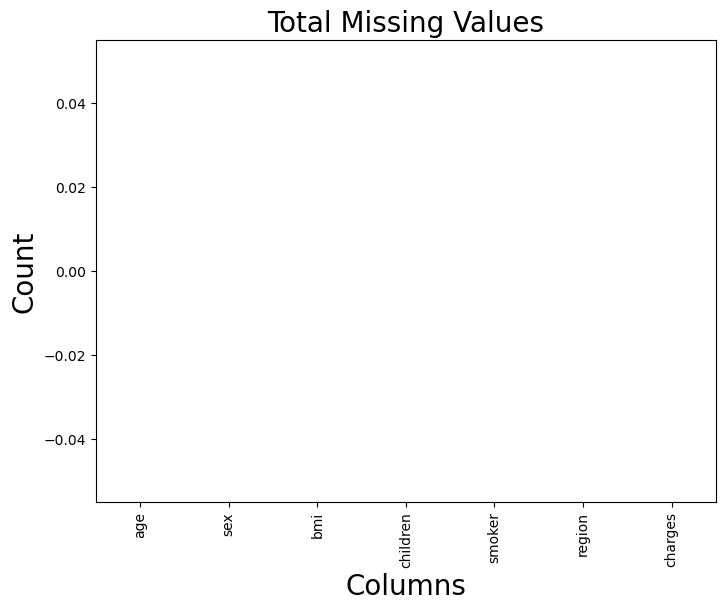

In [13]:
total = data.isnull().sum().sort_values(ascending=False)
total.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

#the empty figure confirms that there are no missing values

## Feature Selection 

We will not drop any attributes, because each of them is contributing to insurance charges

In [14]:
data1 = data.copy()

bins = [0, 18.5, 24.9, 55]
category = ['Underweight', 'Normal', 'Overweight']
bmi_categories = pd.cut(data1['bmi'], bins, labels=category)
data1.loc[:, "bmi_category"] = bmi_categories

In [15]:
data1 = data1[['age', 'sex', 'bmi', 'bmi_category', 'children', 'smoker', 'region', 'charges']]
data1.head()

,age,sex,bmi,bmi_category,children,smoker,region,charges
0,19,female,27.900,Overweight,0,yes,southwest,16884.92400
1,18,male,33.770,Overweight,1,no,southeast,1725.55230
2,28,male,33.000,Overweight,3,no,southeast,4449.46200
3,33,male,22.705,Normal,0,no,northwest,21984.47061
4,32,male,28.880,Overweight,0,no,northwest,3866.85520


## Handling the Outliers 

Text(0.5, 1.0, 'Children')

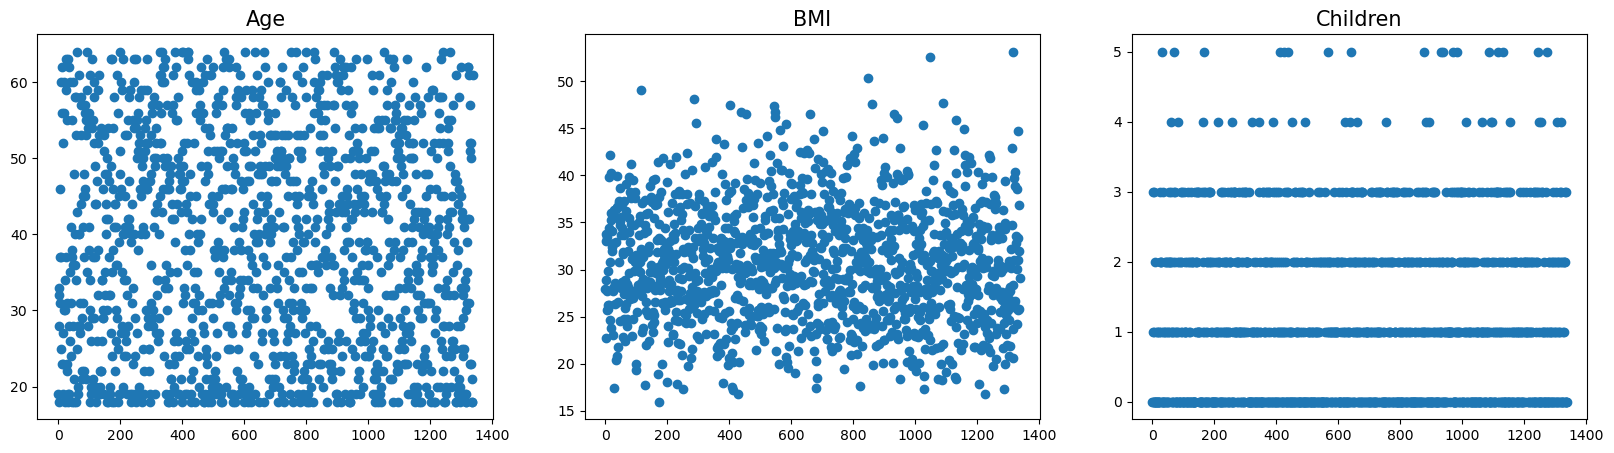

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.scatter(data1.index, data1.age, color='tab:blue')
ax1.set_title('Age', size=15)

ax2.scatter(data1.index, data1.bmi, color='tab:blue')
ax2.set_title('BMI', size=15)

ax3.scatter(data1.index, data1.children, color='tab:blue')
ax3.set_title('Children', size=15)

[Text(0.5, 1.0, 'Children')]

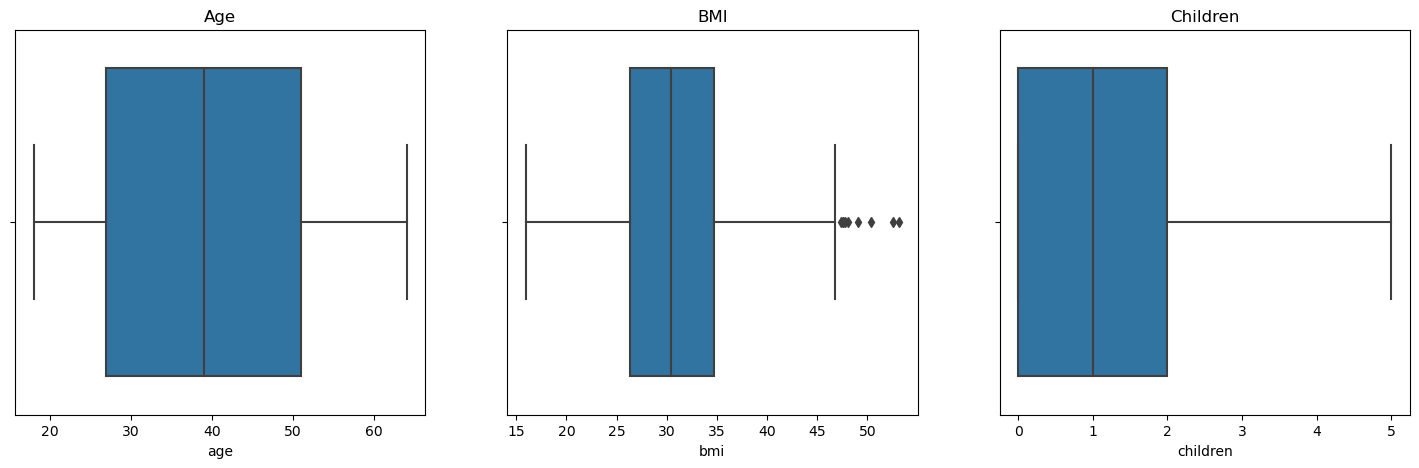

In [17]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(x = data1['age']).set(title='Age')
plt.subplot(1,3,2)
sns.boxplot(x = data1['bmi']).set(title='BMI')
plt.subplot(1,3,3)
sns.boxplot(x = data1['children']).set(title='Children')

## [b] Testing Assumptions for Linear Regression

## [b.1] Linearity Assumption

Since we fit a linear model, we assume that the relationship between the target (price) and other features is linear. \
Linear regression needs the relationship between independent variable and the dependent variable to be linear. We can test this assumption with some scatter plots and regression lines.

In [18]:
data1_num = data1.select_dtypes(include = ['float64', 'int64'])
data1_num_corr = data1_num.corr()['charges'][:-1] # -1 means that the latest row is 'charges'

# Calculate Pearson coefficients from every numeric feature to 'charges'
top_features = data1_num_corr.sort_values(ascending=False)
top_features

age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64

<Axes: title={'center': 'Correlations of Every Feature to Charges'}>

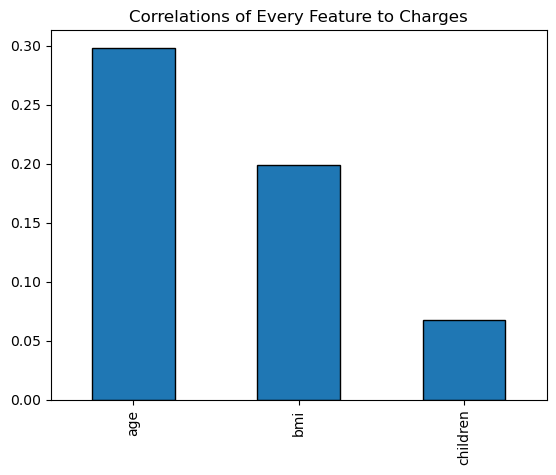

In [19]:
top_features.plot(kind='bar', title='Correlations of Every Feature to Charges', color='tab:blue', edgecolor='black')

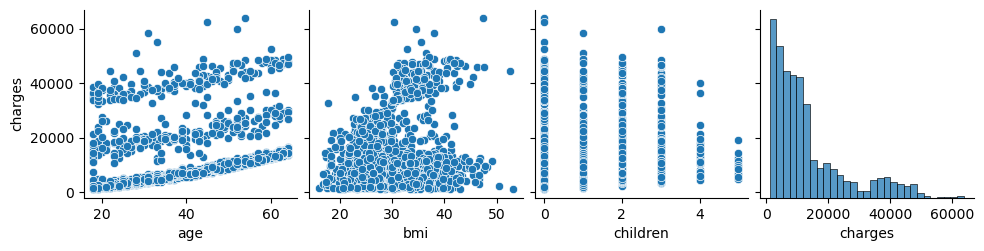

In [20]:
sns.set_palette('tab10')
for i in range(0, len(data1_num.columns), 4):
    sns.pairplot(data=data1_num,
                x_vars=data1_num.columns[i:i+4],
                y_vars=['charges'])

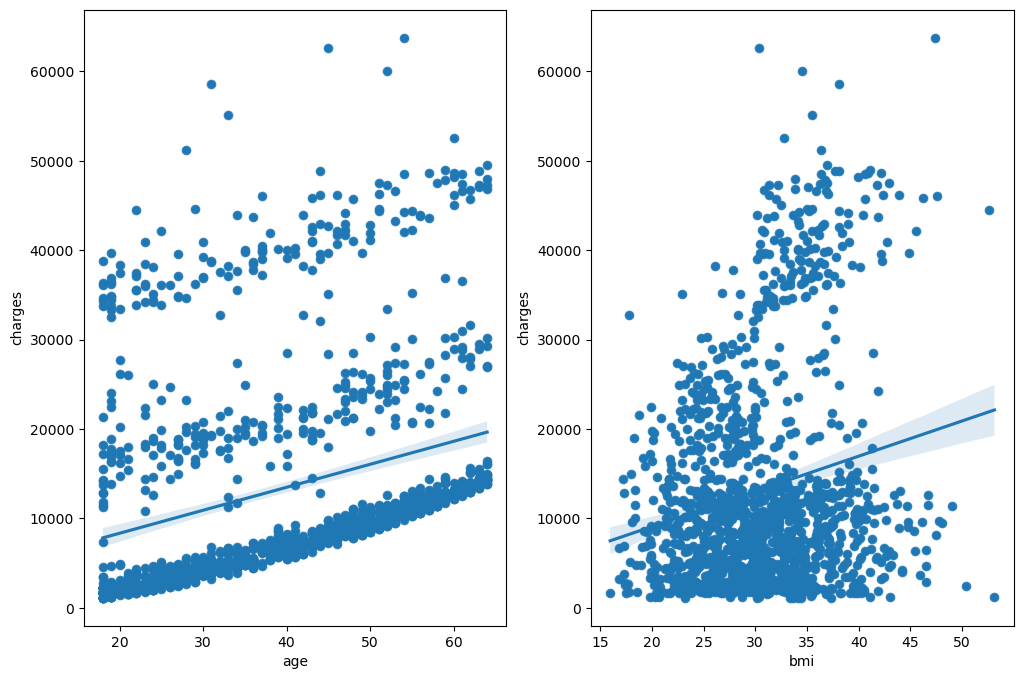

In [21]:
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = data1.age, y = data1.charges,  ax=ax1)
sns.regplot(x=data1.age, y=data1.charges, ax=ax1)
 
sns.scatterplot(x = data1.bmi,y = data1.charges, ax=ax2)
sns.regplot(x=data1.bmi, y=data1.charges, ax=ax2);

<Axes: xlabel='children', ylabel='charges'>

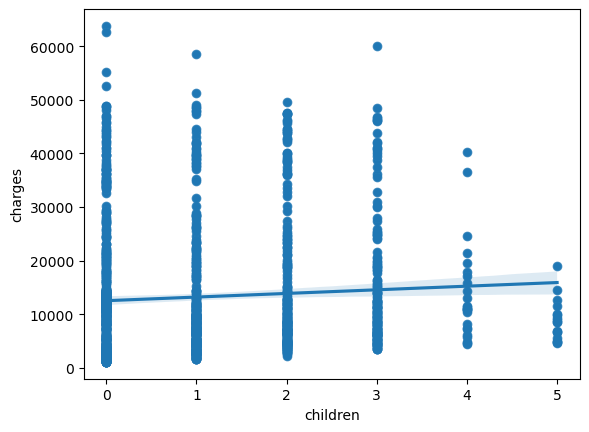

In [22]:
sns.scatterplot(x = data1.children,y = data1.charges)
sns.regplot(x=data1.children, y=data1.charges)

We can see that 'age' and 'bmi' are the closest features which have the linear relationship with insurance charges

## [b.2] Homoscedasticity 

We also expect that the errors, or residuals, are pure random fluctuations around the true line, in other words, the variability in the response (dependent) variable doesn't increase as the value of the predictor (independent) variable increases. This is the assumption of equal variance, also known as Homoscedasticity.

The assumption of homoscedasticity (constant variance), is crucial to linear regression models. Homoscedasticity describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable. In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable, we call it heteroscedasticity, opposite of homoscedasticity.

<Axes: xlabel='bmi', ylabel='charges'>

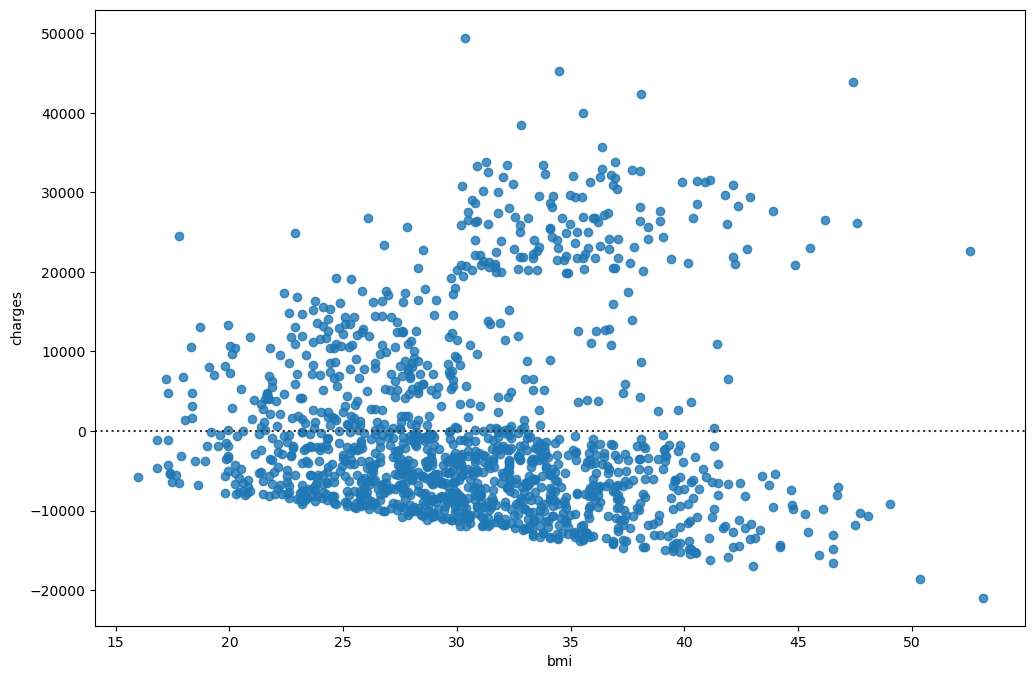

In [23]:
plt.subplots(figsize = (12,8))
sns.residplot(data= data1, x=data1.bmi, y=data1.charges)

<Axes: xlabel='age', ylabel='charges'>

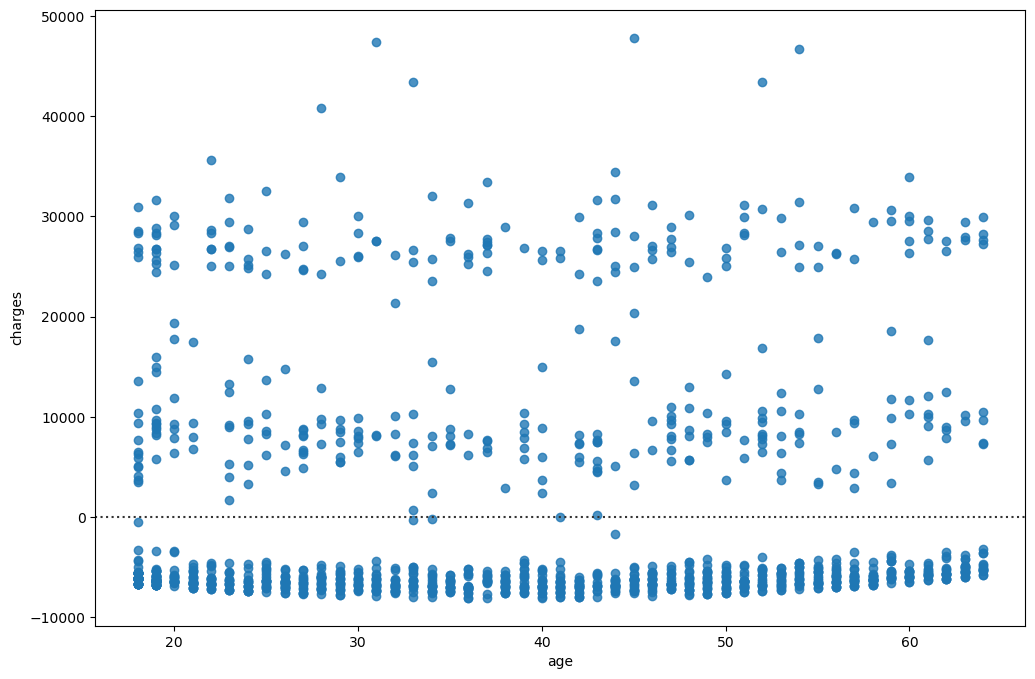

In [24]:
plt.subplots(figsize = (12,8))
sns.residplot(data= data1, x=data1.age, y=data1.charges)

From the above plot, we can tell the error variance across the true line is dispersed somewhat not uniformly, but in a funnel like shape (with 'bmi'). So, the assumption of the homoscedasticity is more likely not met.

## [b.3] Normality 

The linear regression analysis requires the dependent variable, 'charges', to be normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. 

In [25]:
previous_data = data1.copy() #save our data that we have changed so far

Check the attributes' distribution visually

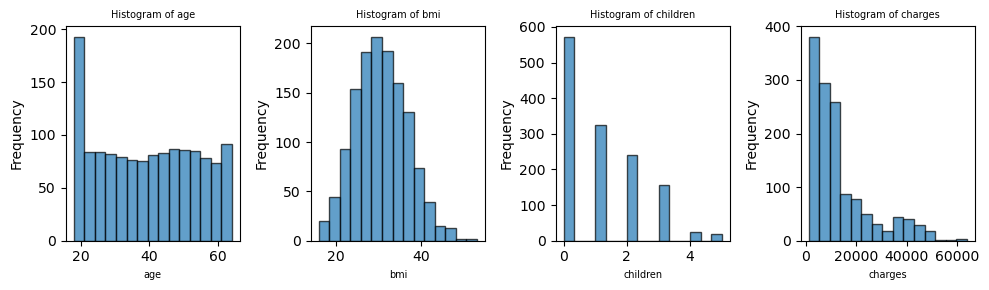

In [26]:
# Number of histograms to display
num_histograms = 4

# Create a 4x4 grid of subplots to accommodate 16 histograms
num_rows = 1
num_cols = 4

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,3))

# Flatten the axes array to iterate through subplots easily
axes_flat = axes.flatten()

# Get a list of (16) distinct colors from the tab20 colormap
#colors = plt.cm.tab10.colors[:num_histograms]

# Iterate through the DataFrame columns and plot histograms with distinct colors
for i, (column, ax) in enumerate(zip(data1_num.columns, axes_flat)):
    data1_num[column].plot.hist(ax=ax, bins=15, alpha=0.7, color='tab:blue', edgecolor='black')
    ax.set_title(f'Histogram of {column}', fontsize = 7)
    ax.set_xlabel(column, fontsize = 7)

# Remove any extra empty subplots if the number of variables is less than 16
#if i < num_histograms - 1:
    #for j in range(i + 1, num_histograms):
        #fig.delaxes(axes_flat[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [27]:
skew_vals = data1_num.skew().sort_values(ascending=False)
skew_vals

charges     1.515391
children    0.937421
bmi         0.283914
age         0.054781
dtype: float64

Based on visual observation and skewness calculation, we can see that our 'charges' feature is not normally distributed. It is right-skewed.\
We can also check statistically if the target is normally distributed, using normaltest() function. If the p-value is large (>0.05), the target variable is normally distributed.

In [28]:
normaltest(data1.charges.values)

NormaltestResult(statistic=336.4416065386955, pvalue=8.762608303862979e-74)

As we can see, the p-value is very small, so it is not normally distributed.

We will perform the 3 kinds of transformations to correct our target variable and to make it more normally distributed.

C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1311709269.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['charges']).set(title='Distribution of Insurance Charges (Untransfromed)')
C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1311709269.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

[Text(0.5, 1.0, 'Distribution of Insurance Charges (Log Transformed)')]

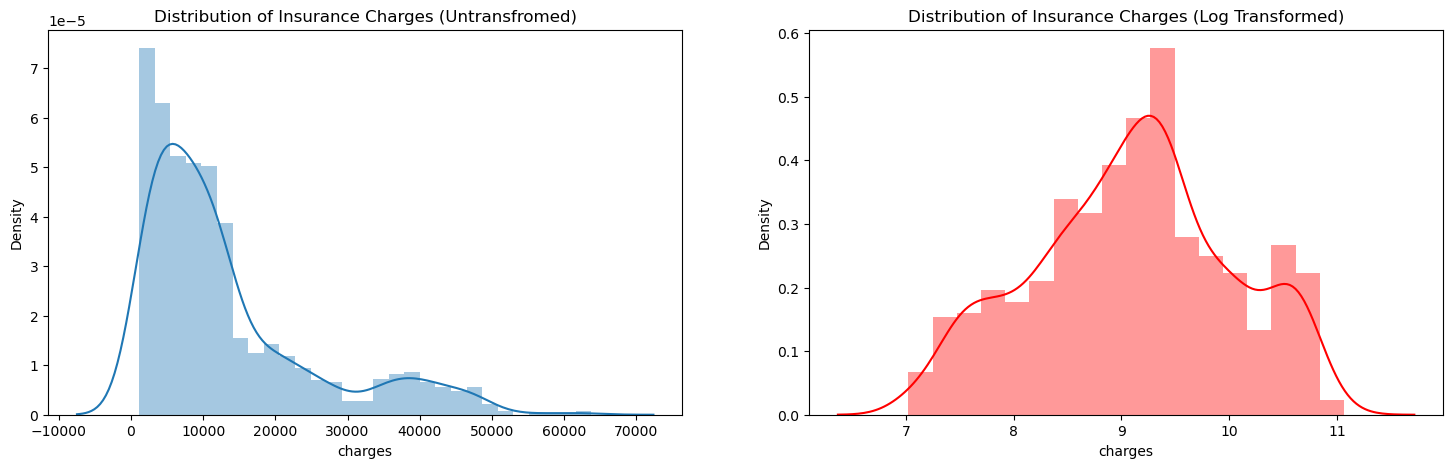

In [29]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(data1['charges']).set(title='Distribution of Insurance Charges (Untransfromed)')

log_transformed = np.log(data1['charges'])
plt.subplot(1,2,2)
sns.distplot(log_transformed, color='r').set(title='Distribution of Insurance Charges (Log Transformed)')

In [30]:
normaltest(log_transformed)

NormaltestResult(statistic=52.147628145443655, pvalue=4.745548606594116e-12)

As we can see, the log method transformed the 'charges' distribution into a more symmetrical bell curve. It is still not perfect, but it is much closer to being normally distributed.

C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\2799815702.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['charges']).set(title='Distribution of Insurance Charges (Untransfromed)')
C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\2799815702.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

[Text(0.5, 1.0, 'Distribution of Insurance Charges (Square Root Transformed)')]

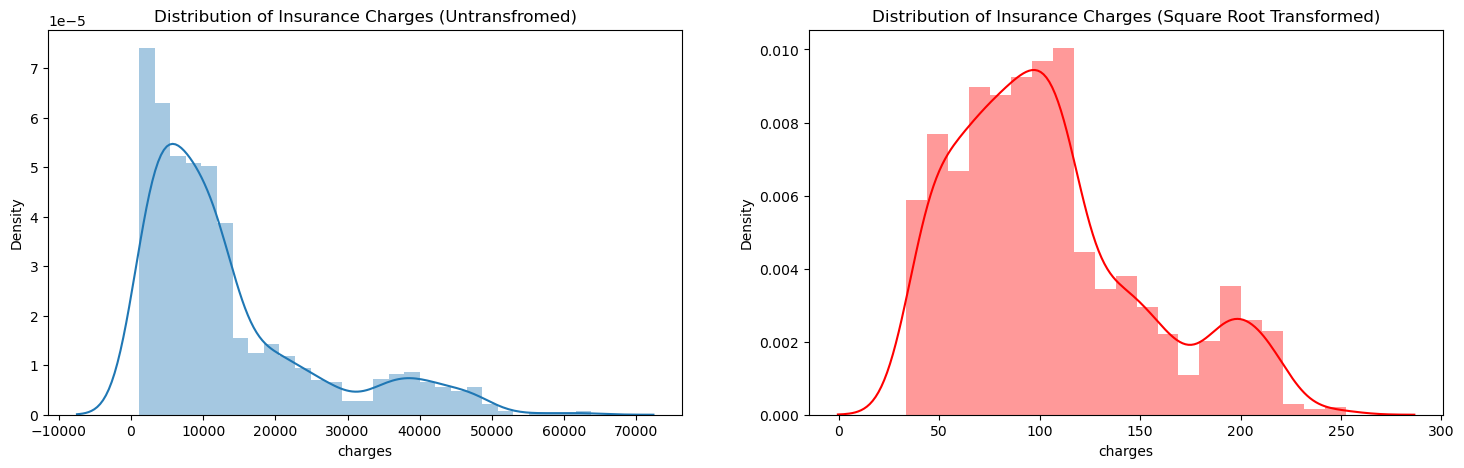

In [31]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(data1['charges']).set(title='Distribution of Insurance Charges (Untransfromed)')

sqrt_transformed = np.sqrt(data1['charges'])
plt.subplot(1,2,2)
sns.distplot(sqrt_transformed, color='r').set(title='Distribution of Insurance Charges (Square Root Transformed)')

In [32]:
normaltest(sqrt_transformed)

NormaltestResult(statistic=112.40691545330931, pvalue=3.900752948411608e-25)

C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\2993521151.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['charges']).set(title='Distribution of Insurance Charges (Untransfromed)')
C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\2993521151.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

[Text(0.5, 1.0, 'Distribution of Insurance Charges (Box Cox Transformed)')]

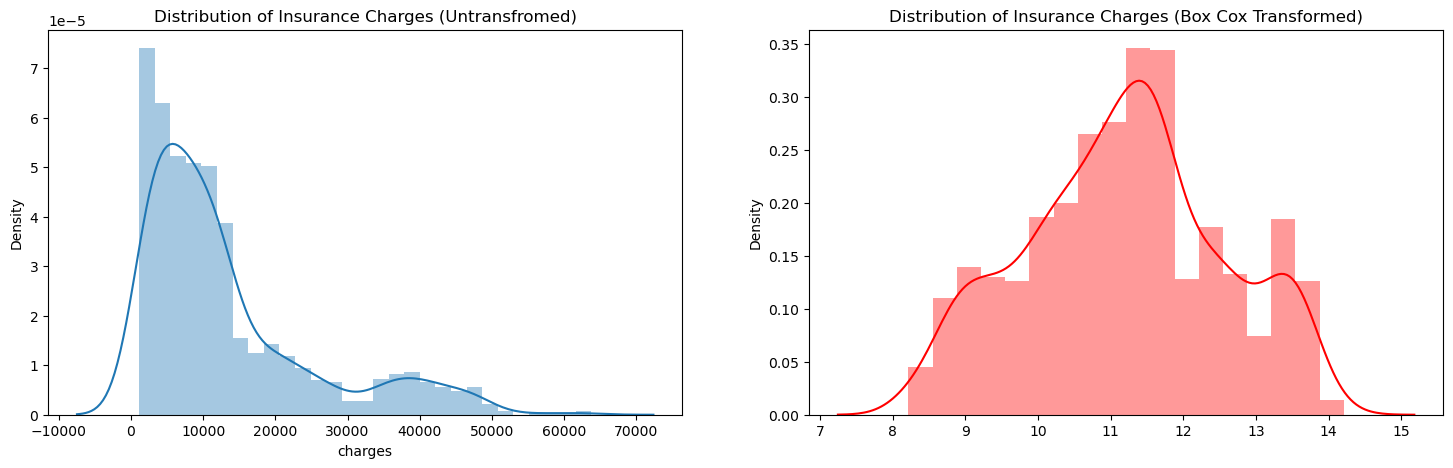

In [33]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.distplot(data1['charges']).set(title='Distribution of Insurance Charges (Untransfromed)')

bc_result = boxcox(data1.charges) #run the box-cox transformation
boxcox_charges = bc_result[0] 
lam = bc_result[1]
plt.subplot(1,2,2)
sns.distplot(boxcox_charges, color='r').set(title='Distribution of Insurance Charges (Box Cox Transformed)')

In [34]:
normaltest(boxcox_charges)

NormaltestResult(statistic=53.89147995320849, pvalue=1.9843296302159134e-12)

From all the normaltest we've done, we can conclude that log transformation gives the biggest p-value result. But, pvalue=4.745548606594116e-12 is still very small (<0.05). Hence, our target variable is still not normally distributed.

## [b.4] Multicollinearity 

We also assume that the observations are independent of one another (no multicollinearity), and there is no correlation between the sequential observations.

Multicollinearity* is when there is a strong correlation between the independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. *Multicollinearity* can lead to a variety of problems, including:

*   The effect of predictor variables estimated by our regression will depend on what other variables are included in our model.
*   Predictors can have widely different results depending on the observations in our sample, and small changes in samples can   result in very different estimated effects.
*   With very high multicollinearity, the inverse matrix, the computer calculations may not be accurate.
*   We can no longer interpret a coefficient on a variable because there is no scenario in which one variable can change without a conditional change in another variable.


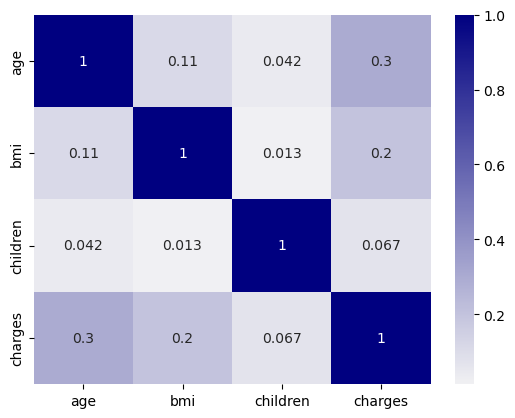

In [35]:
my_cmap = sns.light_palette("Navy", as_cmap=True)

#plt.figure(figsize=(18,18))
sns.heatmap(data1_num.corr(),annot=True,cmap=my_cmap)

plt.show()

It is safe to say that the multicollinearity doesn't exist across various features. The highest one that we got is between 'age' and 'charges', which is very low (only 0.3).

However, we will keep them for now for the sake of learning and let the models (e.x. Regularization models such as Lasso, Ridge in the next lab) do the clean up later on.

## [c] Exploratory Data Analysis

In [36]:
dist_sex = data1['sex'].value_counts(ascending=False)
dist_sex

male      675
female    662
Name: sex, dtype: int64

In [37]:
palette_inferno = sns.color_palette('inferno', 10)
cmap_sex = sns.color_palette([palette_inferno[0], palette_inferno[5]], as_cmap=True)

<Axes: title={'center': 'Distribution of Sex'}>

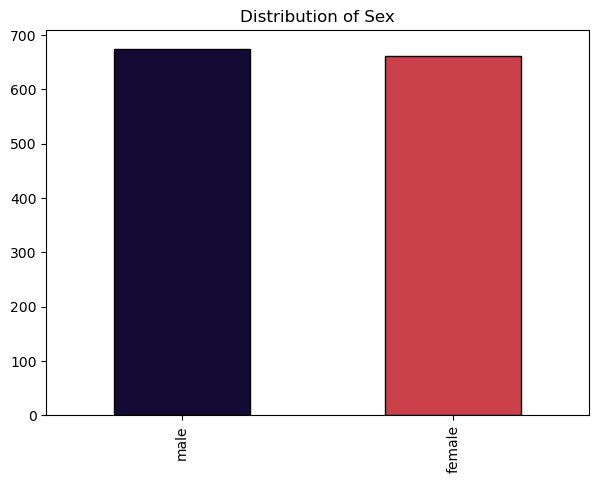

In [38]:
dist_sex.plot(kind='bar', figsize=(7, 5), title='Distribution of Sex', color=cmap_sex, edgecolor='black')

In [39]:
dist_smoker = data1['smoker'].value_counts(ascending=False)
dist_smoker

no     1063
yes     274
Name: smoker, dtype: int64

In [40]:
palette_viridis = sns.color_palette('viridis', 10)
cmap_smoker = sns.color_palette(palette_viridis[0], palette_viridis[9], as_cmap=True)
#cmap_smoker = sns.color_palette('viridis')

In [41]:
cmap_smoker = sns.color_palette([palette_viridis[5], palette_viridis[0]], as_cmap=True)

<Axes: title={'center': 'Distribution of Smoker'}>

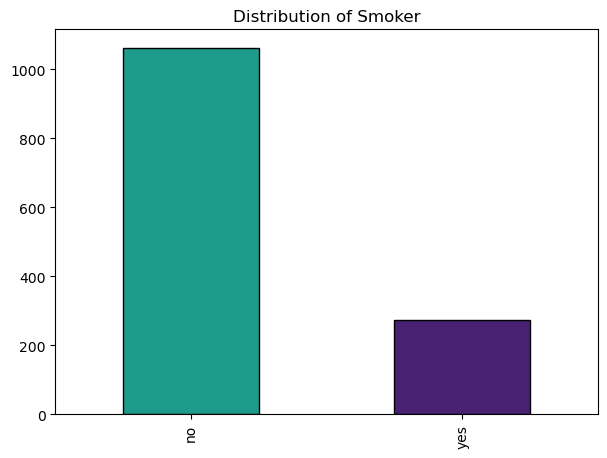

In [42]:
dist_smoker.plot(kind='bar', figsize=(7, 5), title='Distribution of Smoker', color=cmap_smoker, edgecolor='black')

In [43]:
dist_region = data1['region'].value_counts(ascending=False)
dist_region

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [44]:
palette_inferno = sns.color_palette('inferno', 10)

<Axes: title={'center': 'Distribution of Region'}>

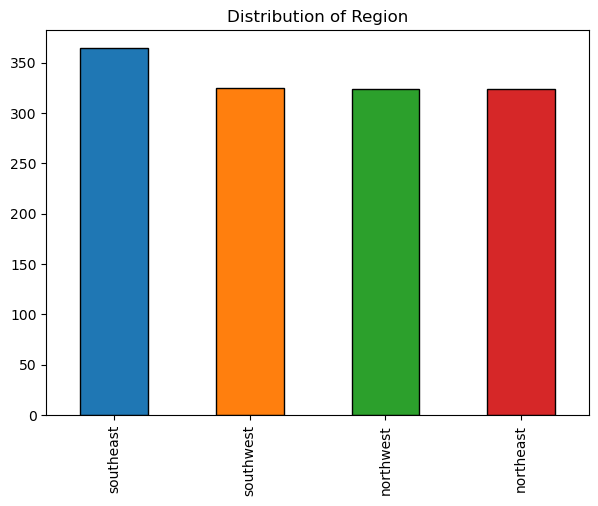

In [45]:
#cmap_region = sns.color_palette([palette_inferno[0], palette_inferno[2], palette_inferno[5], palette_inferno[7]], as_cmap=True)
cmap_region = sns.color_palette('tab10')
dist_region.plot(kind='bar', figsize=(7, 5), title='Distribution of Region', color=cmap_region, edgecolor='black')

In [46]:
dist_bmic = data1['bmi_category'].value_counts(ascending=False)
dist_bmic

Overweight     1095
Normal          221
Underweight      21
Name: bmi_category, dtype: int64

In [47]:
palette_wistia = sns.color_palette('Wistia', 10)

<Axes: title={'center': 'Distribution of BMI Category'}>

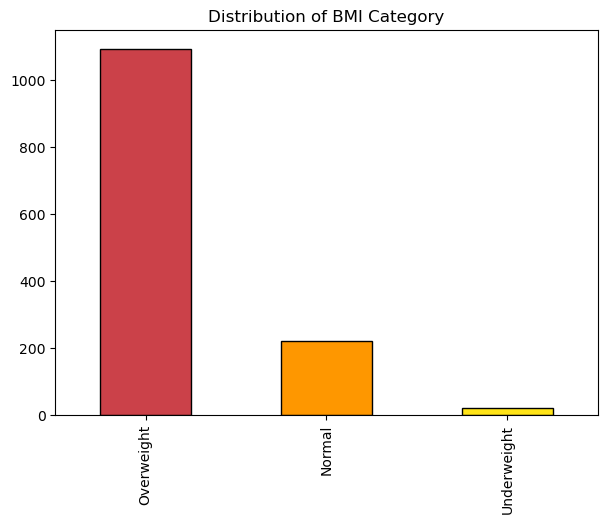

In [48]:
cmap_bmic = sns.color_palette([palette_inferno[5], palette_wistia[8], palette_wistia[2]], as_cmap=True)
dist_bmic.plot(kind='bar', figsize=(7, 5), title='Distribution of BMI Category', color=cmap_bmic, edgecolor='black')

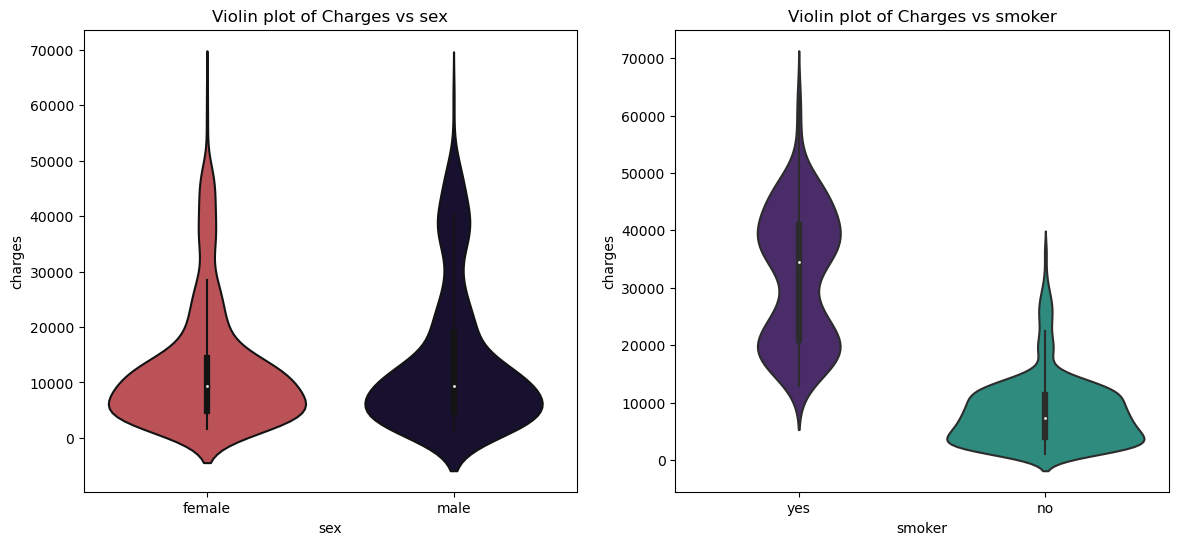

In [49]:
cmap_sex1 = sns.color_palette([palette_inferno[5], palette_inferno[0]], as_cmap=True)
cmap_smoker1 = sns.color_palette([palette_viridis[0], palette_viridis[5]], as_cmap=True)

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=data1, palette=cmap_sex1,ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=data1,palette=cmap_smoker1,ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

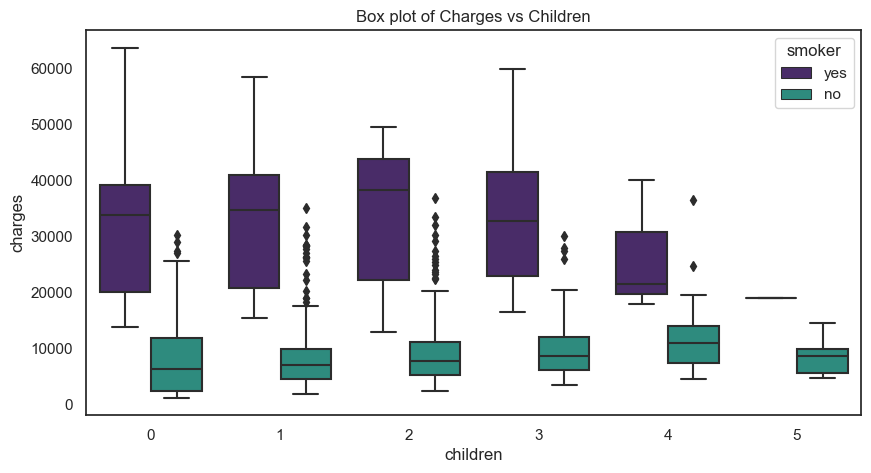

In [50]:
sns.set_style('white')
sns.set_context('notebook')
cmap_smoker1 = sns.color_palette([palette_viridis[0], palette_viridis[5]], as_cmap=True)
sns.set_palette(sns.color_palette(cmap_smoker1))

f = plt.figure(figsize=(10,5))
sns.boxplot(x='children', y='charges', 
            hue='smoker', data=data1).set(title='Box plot of Charges vs Children');

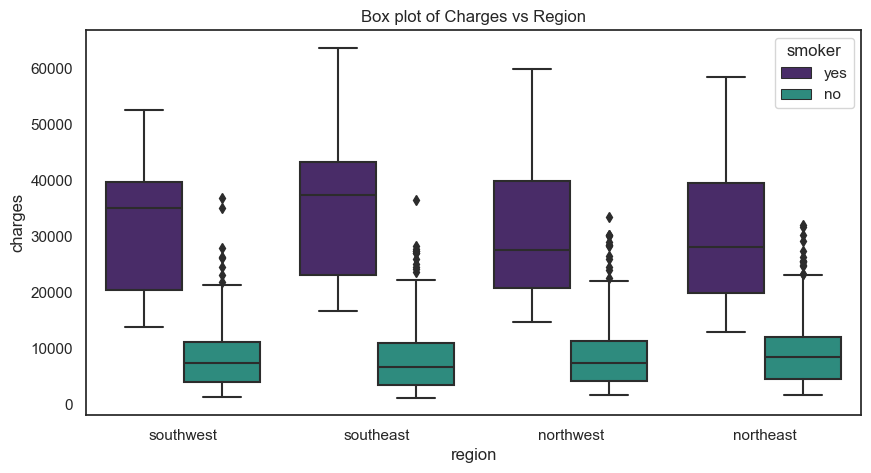

In [51]:
sns.set_style('white')
sns.set_context('notebook')
cmap_smoker1 = sns.color_palette([palette_viridis[0], palette_viridis[5]], as_cmap=True)
sns.set_palette(sns.color_palette(cmap_smoker1))

f = plt.figure(figsize=(10,5))
sns.boxplot(x='region', y='charges', 
            hue='smoker', data=data1).set(title='Box plot of Charges vs Region');

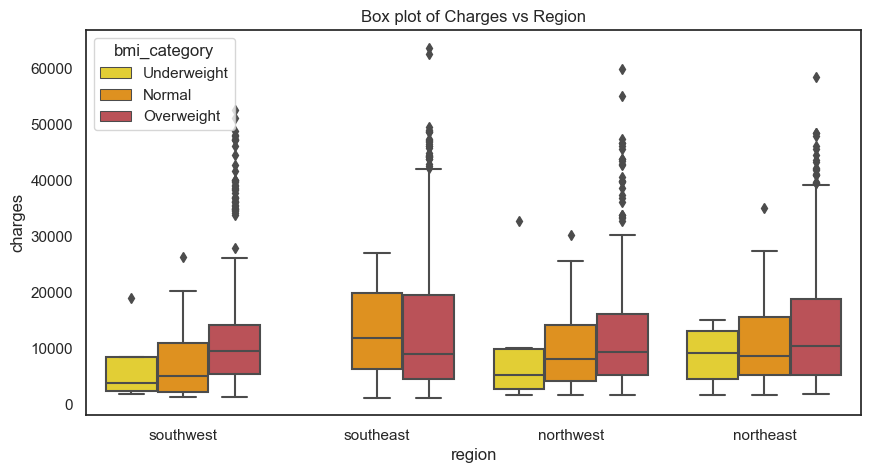

In [52]:
sns.set_style('white')
sns.set_context('notebook')
cmap_bmic1 = sns.color_palette([palette_wistia[2], palette_wistia[8], palette_inferno[5]], as_cmap=True)
sns.set_palette(sns.color_palette(cmap_bmic1))

f = plt.figure(figsize=(10,5))
sns.boxplot(x='region', y='charges', 
            hue='bmi_category', data=data1).set(title='Box plot of Charges vs Region');

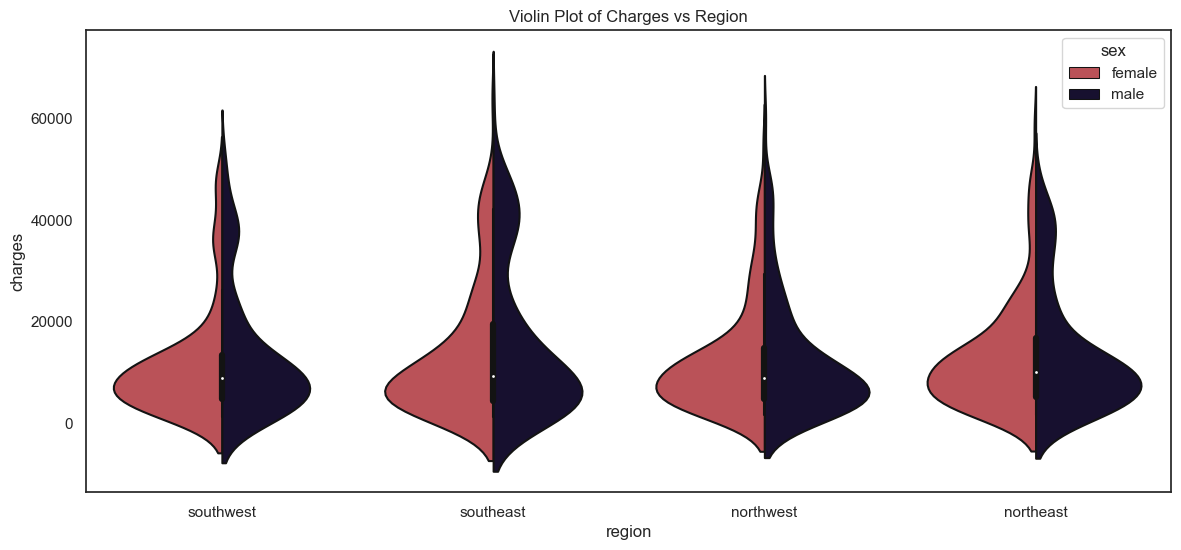

In [53]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=data1, palette=cmap_sex1, split=True)
plt.title('Violin Plot of Charges vs Region');

Text(0.5, 1.0, 'Scatter plot of Charges vs BMI')

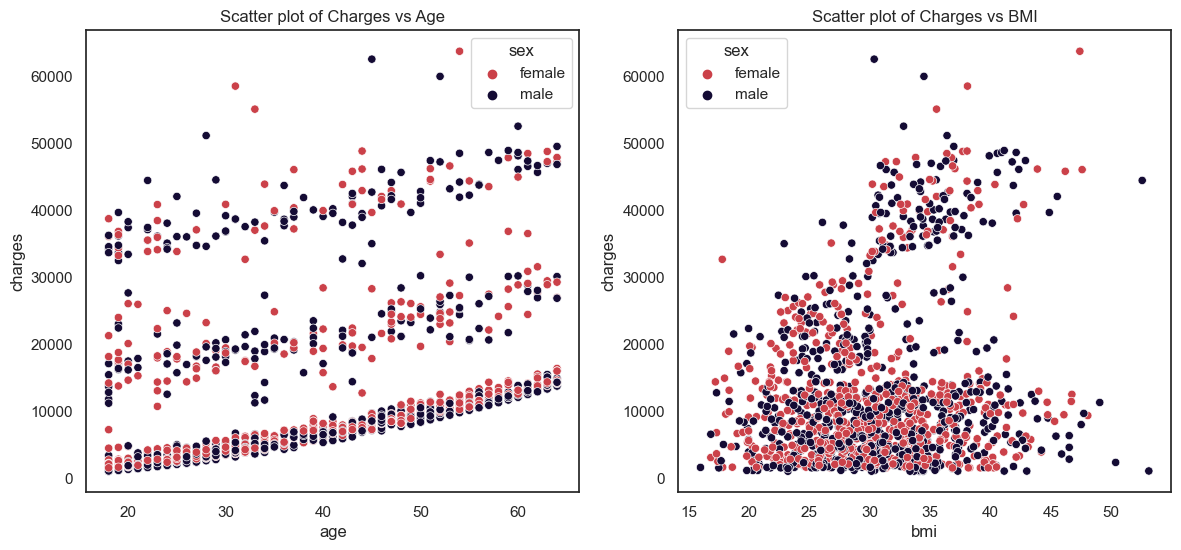

In [54]:
cmap_sex1 = sns.color_palette([palette_inferno[5], palette_inferno[0]], as_cmap=True)

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=data1,palette=cmap_sex1, hue='sex',ax=ax)
ax.set_title('Scatter plot of Charges vs Age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=data1,palette=cmap_sex1, hue='sex')
ax.set_title('Scatter plot of Charges vs BMI')

Text(0.5, 1.0, 'Scatter plot of Charges vs BMI')

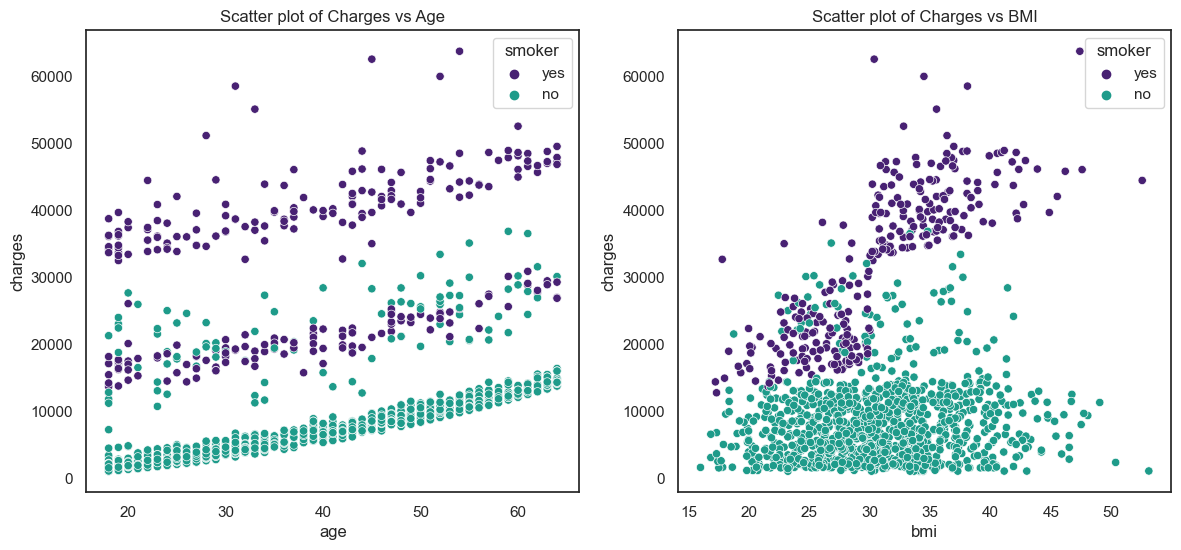

In [55]:
cmap_smoker1 = sns.color_palette([palette_viridis[0], palette_viridis[5]], as_cmap=True)

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=data1,palette=cmap_smoker1,hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs Age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=data1,palette=cmap_smoker1,hue='smoker')
ax.set_title('Scatter plot of Charges vs BMI')

Text(0.5, 1.0, 'Scatter plot of Charges vs BMI')

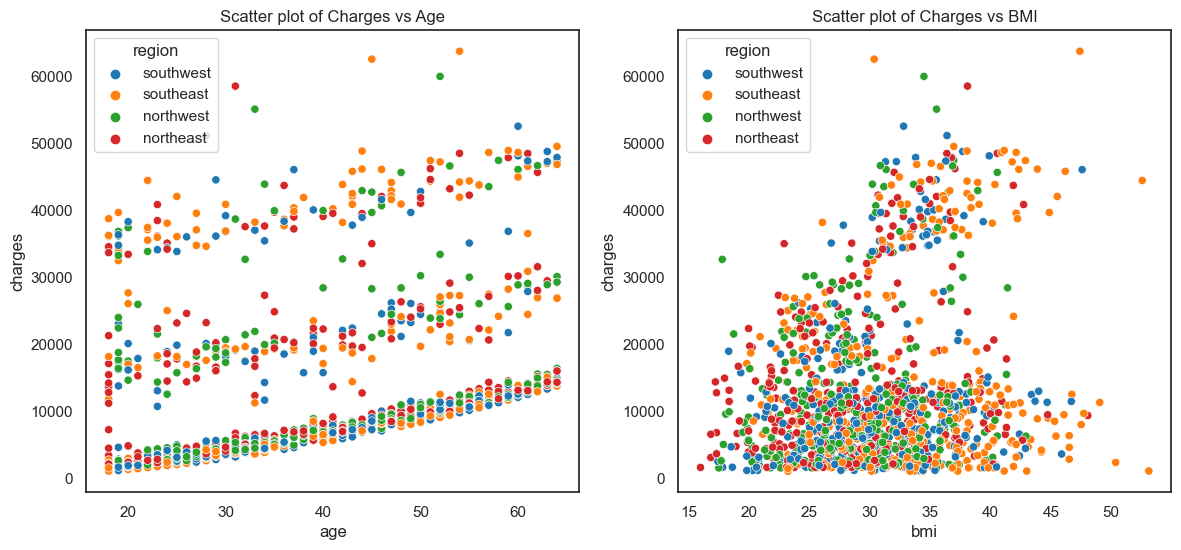

In [56]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=data1,palette='tab10', hue='region',ax=ax)
ax.set_title('Scatter plot of Charges vs Age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=data1,palette='tab10', hue='region')
ax.set_title('Scatter plot of Charges vs BMI')

Text(0.5, 1.0, 'Scatter plot of Charges vs BMI')

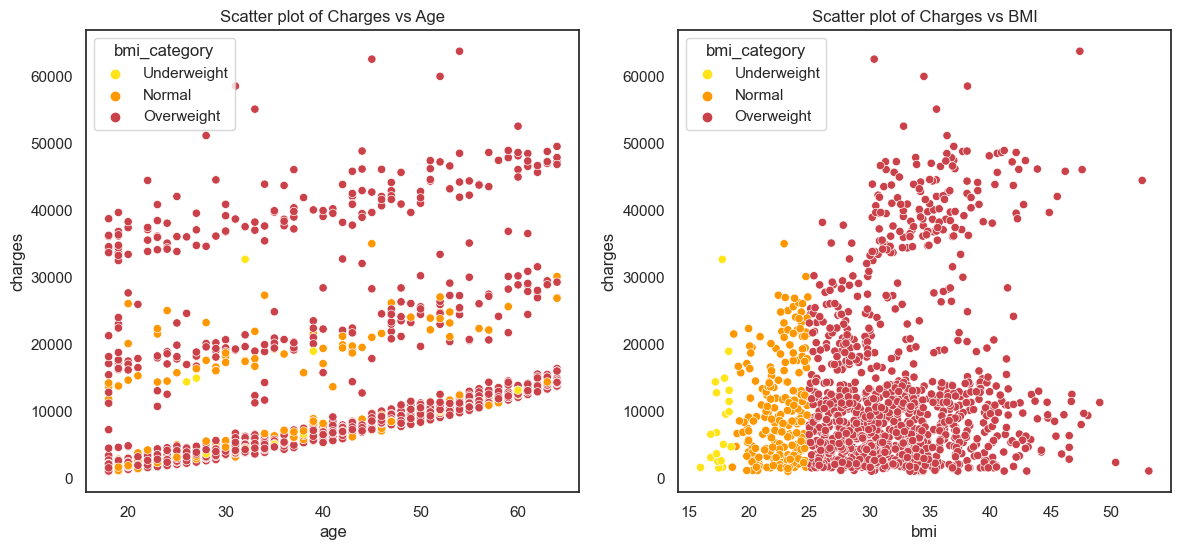

In [57]:
#cmap_bmic = sns.color_palette([palette_inferno[5], palette_wistia[8], palette_wistia[2]], as_cmap=True)
cmap_bmic1 = sns.color_palette([palette_wistia[2], palette_wistia[8], palette_inferno[5]], as_cmap=True)

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=data1,palette=cmap_bmic1, hue='bmi_category',ax=ax)
ax.set_title('Scatter plot of Charges vs Age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=data1,palette=cmap_bmic1, hue='bmi_category')
ax.set_title('Scatter plot of Charges vs BMI')

## [d] Feature Engineering 

Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number. \

1) Label Encoding \
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them. \
2) One hot encoding \
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1. \
3) Dummy variable trap \
The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

In [58]:
mask = data1.dtypes == np.object_
categorical_cols = data1.columns[mask]

In [59]:
mask

age             False
sex              True
bmi             False
bmi_category    False
children        False
smoker           True
region           True
charges         False
dtype: bool

In [60]:
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [61]:
data[categorical_cols].apply(lambda x: x.nunique())

sex       2
smoker    2
region    4
dtype: int64

In [62]:
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

In [63]:
# One way to do One Hot Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data1.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    #when we say index, then we're just going to be looping through each one of these individual columns
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int_)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [64]:
data_ohc.head()

,age,bmi,bmi_category,children,charges,region_0,region_1,region_2,region_3,sex_0,sex_1,smoker_0,smoker_1
0,19,27.900,Overweight,0,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,18,33.770,Overweight,1,1725.55230,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,28,33.000,Overweight,3,4449.46200,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,33,22.705,Normal,0,21984.47061,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,32,28.880,Overweight,0,3866.85520,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [65]:
# But we are going to use this method of One Hot Encoding
data_encode = data1.copy()
data_encode = pd.get_dummies(data = data_encode, prefix = 'OHE', prefix_sep='_',
               columns = categorical_cols,
              dtype='int8')

In [66]:
data_encode.head()

,age,bmi,bmi_category,children,charges,OHE_female,OHE_male,OHE_no,OHE_yes,OHE_northeast,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,Overweight,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,Overweight,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,Overweight,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,Normal,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,Overweight,0,3866.85520,0,1,1,0,0,1,0,0


We will drop features which only have 2 different kinds of encoding, to avoid multicollinearity

In [67]:
data_encode = data_encode.drop(['OHE_female','OHE_no'], axis=1)

In [68]:
data_encode = data_encode.drop(['bmi_category'], axis=1)

In [69]:
data_encode.head()

,age,bmi,children,charges,OHE_male,OHE_yes,OHE_northeast,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [70]:
data_encode.rename(columns = {'OHE_male':'male', 'OHE_yes':'yes', 'OHE_northeast':'northeast','OHE_northwest':'northwest', 
                              'OHE_southeast':'southeast', 'OHE_southwest':'southwest'})

,age,bmi,children,charges,male,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


# 3. Linear Regression Models


Applying log transformation on target attribute

In [71]:
data_encode['charges'] = np.log(data_encode['charges'])

Split the data into the features X and target y

In [72]:
X = data_encode.drop("charges", axis=1)
X.head()

,age,bmi,children,OHE_male,OHE_yes,OHE_northeast,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,0,1,0,0,0,1
1,18,33.770,1,1,0,0,0,1,0
2,28,33.000,3,1,0,0,0,1,0
3,33,22.705,0,1,0,0,1,0,0
4,32,28.880,0,1,0,0,1,0,0


In [73]:
y = data_encode["charges"].copy()
y.head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

Now, we split our data, using train_test_split function, into the training and testing sets, allocating 30% of the data for testing.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=23)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 402
number of training samples: 935


In [75]:
def  plot_dis(y,yhat):
    
    plt.figure()
    plt.figure(figsize=(8,5))
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
   
    plt.legend()

    plt.title('Actual vs Fitted Values')
    #plt.xlabel('Price (in dollars)')
    #plt.ylabel('Proportion of Cars')
    sns.set(font_scale=0.8)

    plt.show()
    plt.close()

## a) Linear Regression 

In [76]:
s = StandardScaler()
lr = LinearRegression()

X_train_s = s.fit_transform(X_train)
lr.fit(X_train_s, y_train)

X_test_s = s.transform(X_test)
y_pred_s = lr.predict(X_test_s)

R2_lr = r2_score(y_pred_s, y_test)
print('R2 Linear Regression (with scaling): ' + str(R2_lr))

R2 Linear Regression (with scaling): 0.7017276264600405


In [77]:
#s = StandardScaler()
lr = LinearRegression()

#X_train_s = s.fit_transform(X_train)
lr.fit(X_train, y_train)

#X_test_s = s.transform(X_test)
y_pred = lr.predict(X_test)

R2_lr = r2_score(y_pred, y_test)
print('R2 Linear Regression (without scaling): ' + str(R2_lr))

R2 Linear Regression (without scaling): 0.7017276264600397


C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1039948634.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1039948634.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yh

<Figure size 640x480 with 0 Axes>

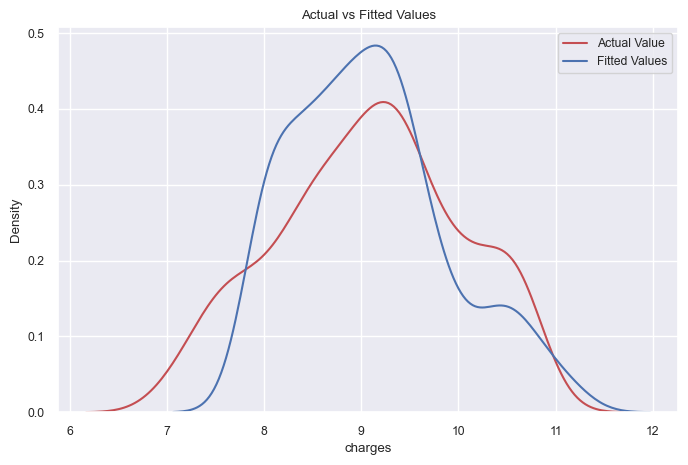

In [118]:
plot_dis(y_test, y_pred_s)

## b) Adding Polynomial Effects on Linear Regression 

In [79]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_train_pf = poly_features.fit_transform(X_train)
X_test_pf = poly_features.transform(X_test)

lr.fit(X_train_pf, y_train)
y_pred_pf = lr.predict(X_test_pf)

R2_lr_pf = r2_score(y_pred_pf, y_test)
print('R2 Linear Regression (with Polynomial Features): ' + str(R2_lr_pf))

R2 Linear Regression (with Polynomial Features): 0.8194730798526149


In [80]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_train_pf = poly_features.fit_transform(X_train)
X_test_pf = poly_features.transform(X_test)

X_trainpf_s = s.fit_transform(X_train_pf)

lr.fit(X_trainpf_s, y_train)
X_testpf_s = s.transform(X_test_pf)

y_predpf_s = lr.predict(X_testpf_s)

R2_lrpf_s = r2_score(y_predpf_s, y_test)
print('R2 Linear Regression (with Scaling & Polynomial Features): ' + str(R2_lrpf_s))

R2 Linear Regression (with Scaling & Polynomial Features): 0.8224682541979906


C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1039948634.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1039948634.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yh

<Figure size 640x480 with 0 Axes>

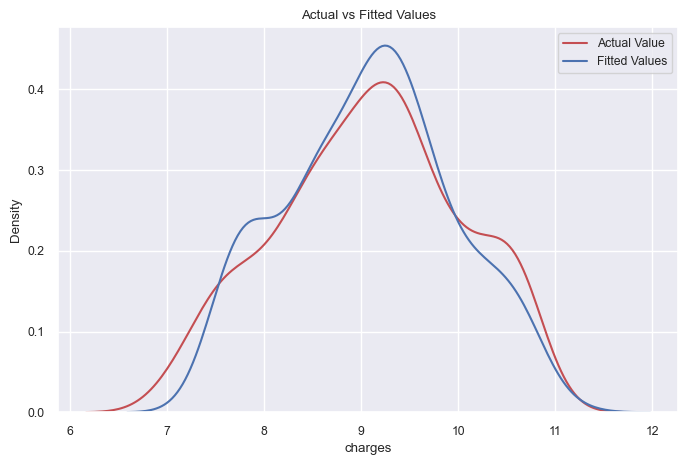

In [81]:
plot_dis(y_test, y_predpf_s)

## c) Ridge Regression 

In [82]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=23)
# We're passing X_pf (not the scaled version), because we can only scale on our training set.
# We can only fit our scaling to our training set, and then we can use that fit in order to transform our test set

In [89]:
r001 = Ridge(alpha = 0.001)

X_train_s = s.fit_transform(X_train)

r001.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)

y_pred_r001 = r001.predict(X_test_s)

R2_r_001 = r2_score(y_pred_r001, y_test)
print('R2 Ridge Regression (alpha = 0.001): ' + str(R2_r_001))

R2 Ridge Regression (alpha = 0.001): 0.8194712822120087


In [125]:
r01 = Ridge(alpha = 0.1)

X_train_s = s.fit_transform(X_train)

r01.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)

y_pred_r01 = r01.predict(X_test_s)

R2_r_01 = r2_score(y_pred_r01, y_test)
print('R2 Ridge Regression (alpha = 0.1): ' + str(R2_r_01))

R2 Ridge Regression (alpha = 0.1): 0.8192935197604169


In [96]:
r1 = Ridge(alpha = 1)

X_train_s = s.fit_transform(X_train)

r1.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)

y_pred_r1 = r1.predict(X_test_s)

R2_r_1 = r2_score(y_pred_r1, y_test)
print('R2 Ridge Regression (alpha = 1): ' + str(R2_r_1))

R2 Ridge Regression (alpha = 1): 0.8177006205139064


We see r2_score keep decreasing as alpha increasing, which means that model with higher alpha had high regularization, and model with lower alpha had lower regularization.

In this case, there weren't too much difference  between R2 of alpha 0.001, 0.1, and 1. But we should keep in mind that with too much regularization, we'll have too much bias, and we'll not able to find the actual underlying relationship between x and y. We would've dumbed down our model and reduced the complexity too much.

In this case for Ridge regression, we will choose ridge model with alpha = 0.001 (highest R2 score)

C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1039948634.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1039948634.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yh

<Figure size 640x480 with 0 Axes>

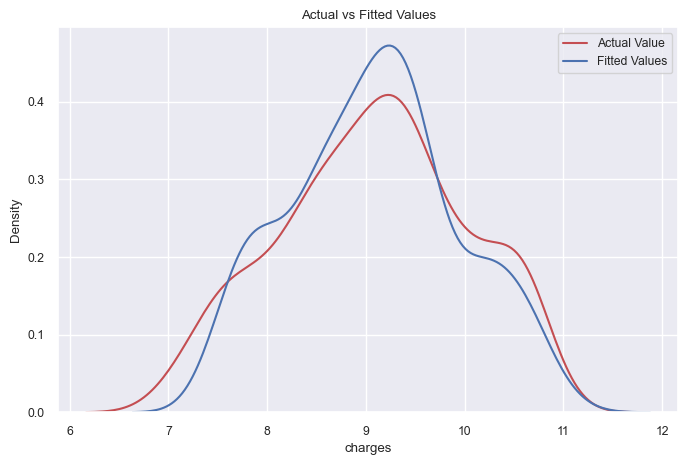

In [97]:
plot_dis(y_test, y_pred_r001)

## d) Lasso Regression 

In [99]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=23)
# We're passing X_pf (not the scaled version), because we can only scale on our training set.
# We can only fit our scaling to our training set, and then we can use that fit in order to transform our test set

In [109]:
las001 = Lasso(alpha=0.001)

X_train_s = s.fit_transform(X_train)

las001.fit(X_train_s, y_train)

X_test_s = s.transform(X_test)
y_pred_l001 = las001.predict(X_test_s)

R2_l_001 = r2_score(y_pred_l001, y_test)
print('R2 Lasso Regression (alpha = 0.001): ' + str(R2_l_001))

R2 Lasso Regression (alpha = 0.001): 0.8145371216113482


In [127]:
las01 = Lasso(alpha=0.1)

X_train_s = s.fit_transform(X_train)

las01.fit(X_train_s, y_train)

X_test_s = s.transform(X_test)
y_pred_l01 = las01.predict(X_test_s)

R2_l_01 = r2_score(y_pred_l01, y_test)
print('R2 Lasso Regression (alpha = 0.1): ' + str(R2_l_01))

R2 Lasso Regression (alpha = 0.1): 0.41370702922392766


In [111]:
las1 = Lasso(alpha=1)

X_train_s = s.fit_transform(X_train)

las1.fit(X_train_s, y_train)

X_test_s = s.transform(X_test)
y_pred_l1 = las1.predict(X_test_s)

R2_l_1 = r2_score(y_pred_l1, y_test)
print('R2 Lasso Regression (alpha = 1): ' + str(R2_l_01))

R2 Lasso Regression (alpha = 1): 0.41370702922392766


Compared to Ridge regularization, now we can see easily how the effect of too much alpha will dumb down our model. Our R2 scores decreased from ~0.8 to ~0.4 real quick.

Hence, we will choose Lasso model with alpha = 0.001 in this case.

C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1039948634.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1039948634.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yh

<Figure size 640x480 with 0 Axes>

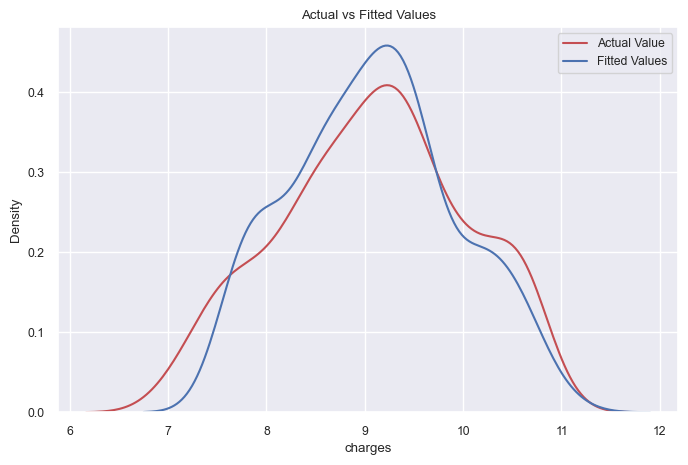

In [108]:
plot_dis(y_test, y_pred_l001)

## e) Elastic Net Regression 

In [175]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=23)
# We're passing X_pf (not the scaled version), because we can only scale on our training set.
# We can only fit our scaling to our training set, and then we can use that fit in order to transform our test set

In [112]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)

X_train_s = s.fit_transform(X_train)

enet.fit(X_train_s,y_train)

X_test_s = s.transform(X_test)
y_pred_enet = enet.predict(X_test_s)

R2_enet = r2_score(y_pred_enet, y_test)
print('R2 Elastic Net Regression (alpha = 0.1, l1_ratio = 0.5): ' + str(R2_enet))

R2 Elastic Net Regression (alpha = 0.1, l1_ratio = 0.5): 0.5638501572346076


In [116]:
enet2 = ElasticNet(alpha=0.01, l1_ratio=0.01)

X_train_s = s.fit_transform(X_train)

enet2.fit(X_train_s,y_train)

X_test_s = s.transform(X_test)
y_pred_enet2 = enet2.predict(X_test_s)

R2_enet2 = r2_score(y_pred_enet2, y_test)
print('R2 Elastic Net Regression (alpha = 0.01, l1_ratio = 0.01): ' + str(R2_enet2))

R2 Elastic Net Regression (alpha = 0.01, l1_ratio = 0.01): 0.8047807770780327


With lower parameters, we can see that we get higher R2 score. This means we give our model lower regularization.
We will choose elastic net model with highest R2 score for comparison (alpha=0.01, l1_ratio=0.01).

C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1039948634.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\GOOD\AppData\Local\Temp\ipykernel_5704\1039948634.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yh

<Figure size 640x480 with 0 Axes>

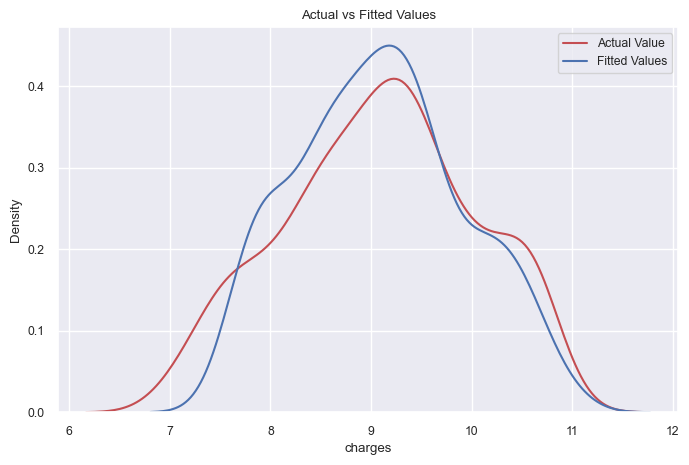

In [117]:
plot_dis(y_test, y_pred_enet2)

In [123]:
data = [['tom', 10], ['nick', 15], ['juli', 14]]
data_compare = [['Linear Regression (with scaling)', R2_lr], ['Polynomial Regression (with scaling)', R2_lrpf_s],
               ['Ridge Regression (alpha=0.001)', R2_r_001], ['Lasso Regression (alpha=0.001)', R2_l_001],
               ['Elastic Net Regression (alpha=0.001, l1_ratio=0.001)', R2_enet2]]
df = pd.DataFrame(data_compare, columns=['Model', 'R2_score'])
print(df)

                                               Model  R2_score
0                   Linear Regression (with scaling)  0.701728
1               Polynomial Regression (with scaling)  0.822468
2                     Ridge Regression (alpha=0.001)  0.819471
3                     Lasso Regression (alpha=0.001)  0.814537
4  Elastic Net Regression (alpha=0.001, l1_ratio=...  0.804781


# 4. Insights and key findings


1) In our test of assumptions of linear regression, only multicollinearity assumption that most likely met with with the criteria.
2) The best transformation method to make charges distribution more normally distributed is log transformation.
3) Scaling in linear regression model doesn't affect the result of our model.
4) For this dataset, the best model to predict medical insurance charge is polynomial regression with 2 degree polynomial.
5) In this case, Ridge regression gives a better prediction model than Lasso regression in the same alpha (0.001).
6) Higher alpha value means higher regularization and lower model complexity, while lower alpha value means lower regularization and more complex model. We need to find the right alpha value (can't be too high, but also can't be too low) in order to find the balance of bias-complexity tradeoff.

# 5. Next Steps


1) We can use other cross validation method such as SearchGridCV to find the best combination of hyperparameters automatically. But one should remember that it will take longer computation timing in this size of dataset.
2) We can include our bmi_category that we had defined before in our regression model.
3) We can add other features in our dataset that can affect charges, such as profession, health condition, and income level.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
